## Importing libraries

In [815]:
!pip install missingno
!pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Loading and checking the data set

In [816]:
# Loading the dataset to a Pandas DataFrame
df = pd.read_csv("profile_and_loan_details_data.csv")

# Print First 5 rows of our DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA (Exploratory Data Analysis)

### data exploration

In [817]:
# checking the number of rows and Columns in the data frame
df.shape

(614, 13)

In [818]:
#checking the name each columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [819]:
# checking the info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


  1. Categorical variable

In [820]:
# Loan ID
df.Loan_ID.value_counts(dropna=False)

LP001002 1
LP002328 1
LP002305 1
LP002308 1
LP002314 1
 ..
LP001692 1
LP001693 1
LP001698 1
LP001699 1
LP002990 1
Name: Loan_ID, Length: 614, dtype: int64

It can be seen that there are 614 unique ID in the dataset.

In [821]:
def calculate_percentage_and_plot(column):
    count_values = df[column].value_counts(dropna=False)
    print(count_values)
    sns.countplot(x=column, data=df, palette="hls", hue=column, legend=False)
    plt.show()
    
    for value in count_values.index:
        if pd.isna(value):
            count_null = len(df[df[column].isnull()])
            percentage_null = (count_null / len(df[column])) * 100
            print(f"Percentage of nan: {percentage_null:.2f}%")
        else:
            count = len(df[df[column] == value])
            percentage = (count / len(df[column])) * 100
            print(f"Percentage of {value}: {percentage:.2f}%")

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Percentage of Male: 79.64%
Percentage of Female: 18.24%
Percentage of nan: 2.12%


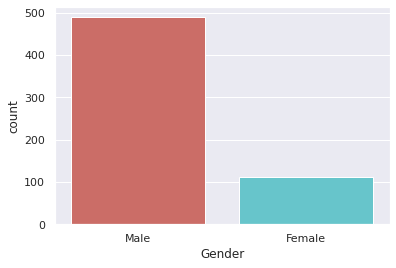

In [822]:
calculate_percentage_and_plot('Gender')

The number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

Yes    398
No     213
NaN      3
Name: Married, dtype: int64
Percentage of Yes: 64.82%
Percentage of No: 34.69%
Percentage of nan: 0.49%


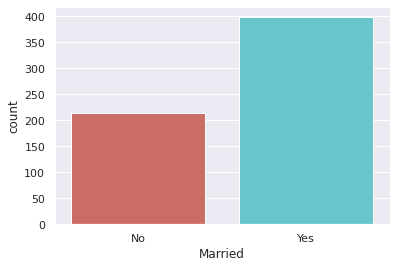

In [823]:
calculate_percentage_and_plot('Married')

The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
Percentage of 0: 56.19%
Percentage of 1: 16.61%
Percentage of 2: 16.45%
Percentage of 3+: 8.31%
Percentage of nan: 2.44%


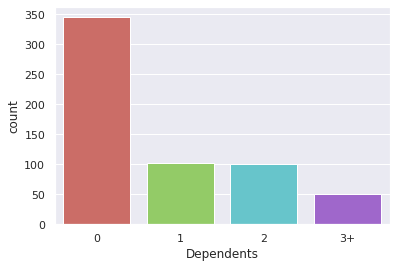

In [824]:
calculate_percentage_and_plot('Dependents')

The number of applicants without dependents is the highest. It can also be seen that there are missing values in this column.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Percentage of Graduate: 78.18%
Percentage of Not Graduate: 21.82%


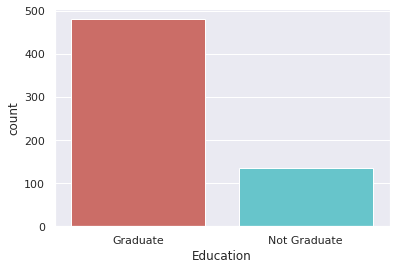

In [825]:
calculate_percentage_and_plot('Education')

The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
Percentage of No: 81.43%
Percentage of Yes: 13.36%
Percentage of nan: 5.21%


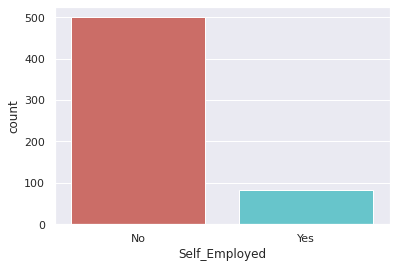

In [826]:
calculate_percentage_and_plot('Self_Employed')

The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen there are missing values in this column.

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Percentage of 360.0: 83.39%
Percentage of 180.0: 7.17%
Percentage of 480.0: 2.44%
Percentage of nan: 2.28%
Percentage of 300.0: 2.12%
Percentage of 240.0: 0.65%
Percentage of 84.0: 0.65%
Percentage of 120.0: 0.49%
Percentage of 60.0: 0.33%
Percentage of 36.0: 0.33%
Percentage of 12.0: 0.16%


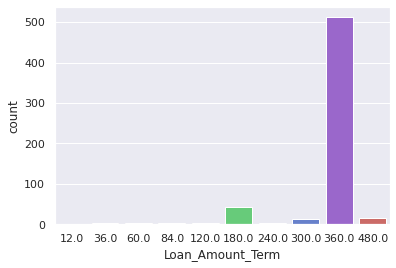

In [827]:
calculate_percentage_and_plot('Loan_Amount_Term')

As can be seen from the results, the 360 days loan duration is the most popular compared to others.

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64
Percentage of 1.0: 77.36%
Percentage of 0.0: 14.50%
Percentage of nan: 8.14%


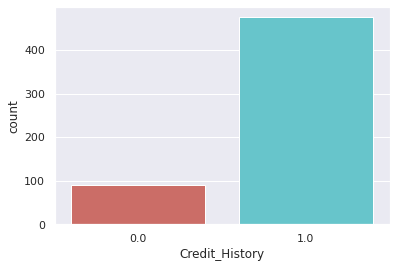

In [828]:
calculate_percentage_and_plot('Credit_History')

The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen there are missing values in this column.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Percentage of Semiurban: 37.95%
Percentage of Urban: 32.90%
Percentage of Rural: 29.15%


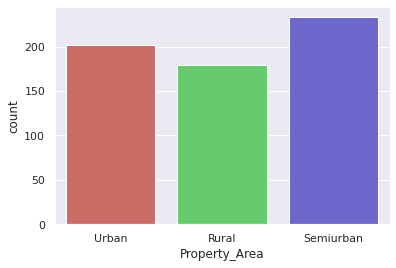

In [829]:
calculate_percentage_and_plot('Property_Area')

This column has a balanced distribution between Urban, Rural, and Semiurban property area.

Y    422
N    192
Name: Loan_Status, dtype: int64
Percentage of Y: 68.73%
Percentage of N: 31.27%


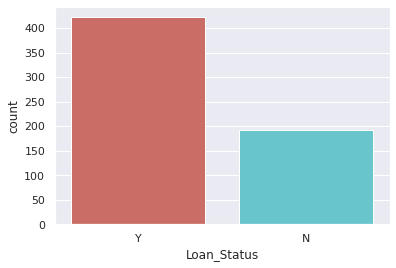

In [830]:
calculate_percentage_and_plot('Loan_Status')

The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

2. Numerical Variable

In [831]:
# describe numerical variable
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


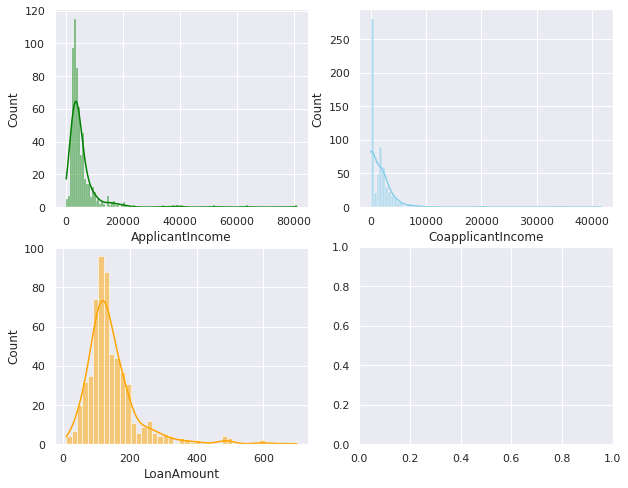

In [832]:
# Distribution of Numerical Variable
# Histogram Distribution
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

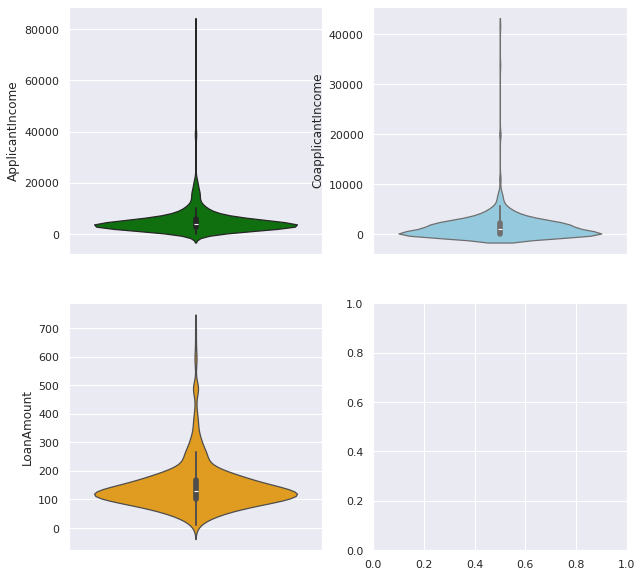

In [833]:
# Violin Plot
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).

3. other exploration

<ipython-input-834-a8abfa322ab9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno');


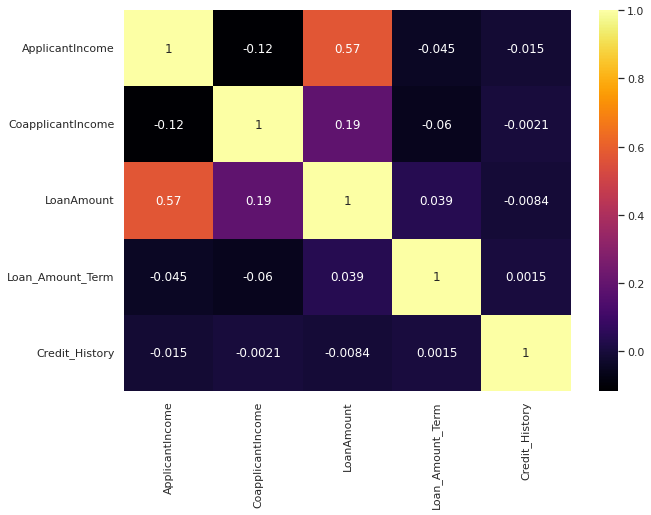

In [834]:
# Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

There is positive correlation between Loan Amount and Applicant Income

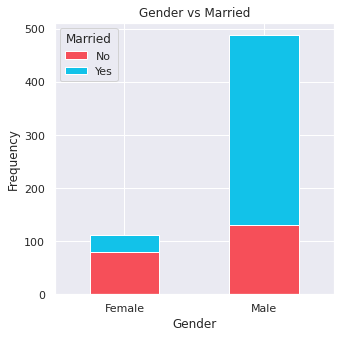

In [835]:
# Categorical 📊 - Categorical 📊
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

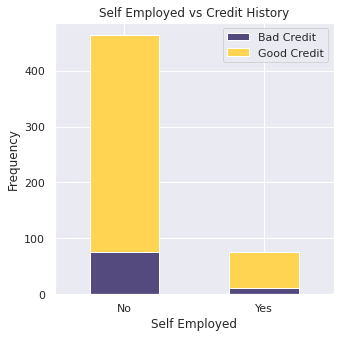

In [836]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most applicants who are not self-employed have good credit, while self-employed applicants usually have lower credit.

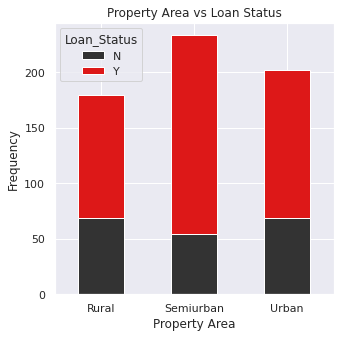

In [837]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most approved loans are for properties in semiurban areas, compared to urban and rural areas.

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

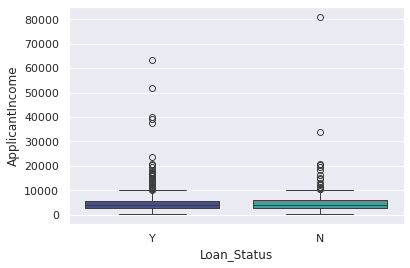

In [838]:
# Categorical 📊- Numerical 📈
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, hue="Loan_Status", palette="mako")

There are many outliers in Applicant Income, and the distribution is also positively skewed.

<Axes: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

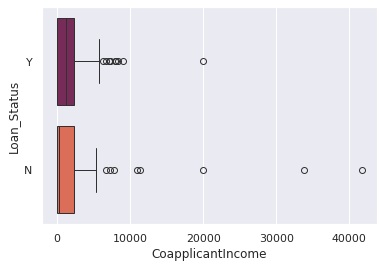

In [839]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, hue="Loan_Status", palette="rocket")

There are many outliers in Co Applicant Income, and the distribution is also positively skewed.

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

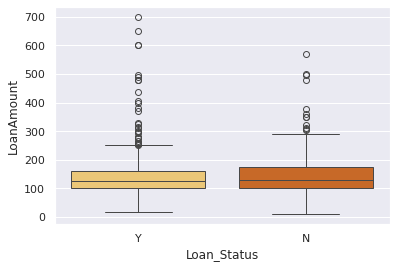

In [840]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, hue="Loan_Status", palette="YlOrBr")

Loan Amount is similar to Applicant Income and Co-applicant Income, as it also has outliers and is positively skewed.

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40)


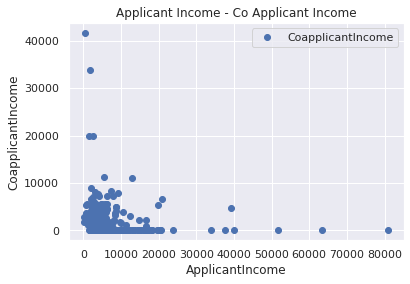

In [841]:
# Numerical 📈 - Numerical 📈
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

There is **negative correlation** between Applicant income and Co Applicant Income.

The correlation coefficient is **significant** at the 95 per cent confidence interval, as it has a **p-value of 1.46**

4. Null Values

In [842]:
# check for missing values
df.isnull().sum()

Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0
dtype: int64

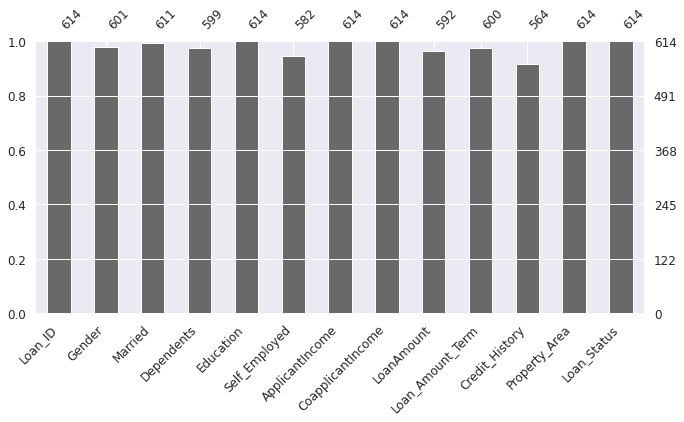

In [843]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

### - Data preprocessing 

1. Drop Unnecessary Variables

In [844]:
df = df.drop(['Loan_ID'], axis = 1)

2. Data Imputation

In [845]:
# Relationship between 'Credit_History' and 'Loan_Status'
loan_status_relationship = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
print("\nRelationship between Credit_History and Loan_Status:")
print(loan_status_relationship)


Relationship between Credit_History and Loan_Status:
Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


In [846]:
# Categorical Variables
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df.loc[(df['Loan_Status'] == 'N') & (df['Credit_History'].isna()), 'Credit_History'] = 0.0
df.loc[(df['Loan_Status'] == 'Y') & (df['Credit_History'].isna()), 'Credit_History'] = 1.0

In [847]:
# Numerical Variables
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

3. One-hot Encoding

In [848]:
df = pd.get_dummies(df)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [849]:
# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [850]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,1,0,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,1,1,0,1,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1


4. Remove Outliers & Infinite values

In [851]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

5. Skewed Distribution Treatment

In the previous section, it is already shown that
**distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed**

Apply the **square root transformation** method to normalize the distribution.


In [852]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<ipython-input-852-2090245e4d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
<ipython-input-852-2090245e4d6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
<ipython-input-852-2090245e4d6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

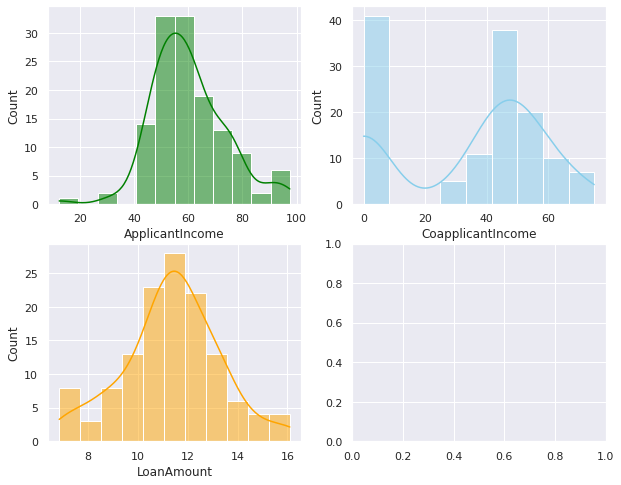

In [853]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

- Train Model

In [854]:
X = df.drop(columns=["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [855]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
13,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0
15,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
19,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,56.409219,54.009258,12.688578,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
586,47.927028,39.012818,10.198039,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
588,68.920244,0.000000,9.695360,360.0,1.0,1,0,1,0,0,0,1,0,0,1,0
603,60.630026,65.582010,13.114877,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0


In [856]:
y

0 1
4 1
13 0
15 1
19 1
 ..
579 1
586 1
588 1
603 1
608 1
Name: Loan_Status, Length: 132, dtype: uint8

In [857]:
X.shape

(132, 16)

In [858]:
print(y.value_counts())

1    112
0     20
Name: Loan_Status, dtype: int64


<ipython-input-859-59a7f55f6d13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


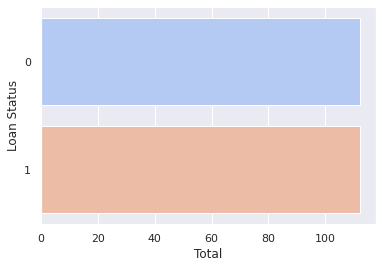

In [859]:
X, y = SMOTE().fit_resample(X, y)

sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [860]:
X.shape

(224, 16)

In [861]:
print(y.value_counts())

1    112
0    112
Name: Loan_Status, dtype: int64


In [862]:
X = MinMaxScaler().fit_transform(X)

In [863]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [864]:
print(y.value_counts())

1    112
0    112
Name: Loan_Status, dtype: int64


1. LogisticRegression

In [865]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=0)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))
LRclassifier.score(X_train,y_train)

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        27
           1       0.58      1.00      0.73        18

    accuracy                           0.71        45
   macro avg       0.79      0.76      0.71        45
weighted avg       0.83      0.71      0.70        45

[[14 13]
 [ 0 18]]
LR accuracy: 71.11%


0.7318435754189944

2. K-Nearest Neighbour (KNN)

KNN best accuracy: 91.11%


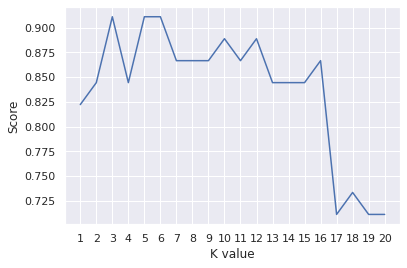

In [866]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

3. Support Vector Machine (SVM)

In [867]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.57      0.94      0.71        18

    accuracy                           0.69        45
   macro avg       0.75      0.73      0.69        45
weighted avg       0.79      0.69      0.68        45

[[14 13]
 [ 1 17]]
SVC accuracy: 68.89%


4. Naive Bayes

In [868]:
# Categorical NB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       0.75      1.00      0.86        18

    accuracy                           0.87        45
   macro avg       0.88      0.89      0.87        45
weighted avg       0.90      0.87      0.87        45

[[21  6]
 [ 0 18]]
Categorical Naive Bayes accuracy: 86.67%


In [869]:
# Gaussian NB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.64      0.89      0.74        18

    accuracy                           0.76        45
   macro avg       0.77      0.78      0.76        45
weighted avg       0.80      0.76      0.76        45

[[18  9]
 [ 2 16]]
Gaussian Naive Bayes accuracy: 75.56%


5. Decision Tree

Decision Tree Accuracy: 77.78%


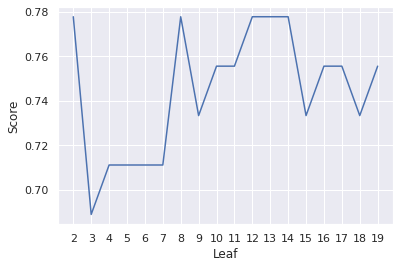

In [870]:
scoreListDT = []
for i in range(2,20):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,20), scoreListDT)
plt.xticks(np.arange(2,20,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

6. Random Forest

Random Forest Accuracy:  91.11%


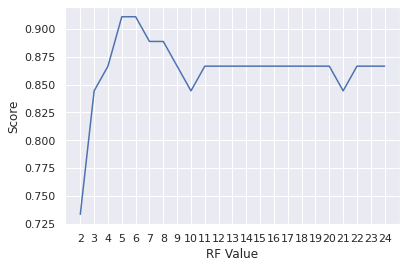

In [871]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 0, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

7. Gradient Boosting

In [872]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [873]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=5)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
 param_distributions={'max_depth': [1, 2, 3, 4, 5],
 'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
 50],
 'n_estimators': [100, 200, 300, 400,
 500],
 'subsample': [0.5, 1]}) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomizedSearchCV RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
 param_distributions={'max_depth': [1, 2, 3, 4, 5],
 'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
 50],
 'n_estimators': [100, 200, 300, 400,
 500],
 'subsample': [0.5, 1]}) estimator: GradientBoostingClassifier GradientBoostingClassifier() GradientBoostingClassifier GradientBoostingClassifier()

In [874]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=500,
                           subsample=1)
0.8214285714285714
{'subsample': 1, 'n_estimators': 500, 'max_leaf_nodes': 50, 'max_depth': 5}
6


In [875]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=5, max_leaf_nodes=50)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.85      0.61      0.71        18

    accuracy                           0.80        45
   macro avg       0.81      0.77      0.78        45
weighted avg       0.81      0.80      0.79        45

[[25  2]
 [ 7 11]]
Gradient Boosting accuracy: 80.00%


- Model Comparison

In [876]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,91.111111
6,Random Forest,91.111111
3,Categorical NB,86.666667
7,Gradient Boost,80.000000
5,Decision Tree,77.777778
4,Gaussian NB,75.555556
0,Logistic Regression,71.111111
2,SVM,68.888889
